# Retail Giant Sales Forecasting Assignment

Global Mart is an online supergiant store that has worldwide operations. 
This store takes orders and delivers across the globe and deals with all the major product categories — 
consumer, 
corporate & 
home office.

As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, 
so that you have a proper estimate and can plan your inventory and business processes accordingly.

#### Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [2]:
retail=pd.read_csv("Global+Superstore+Data.csv")
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


#### Determining the shape of the dataset

In [3]:
retail.shape

(51290, 5)

#### Determining the missing values 

In [4]:
retail.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

#### Checking for the Unique Values in the Column - Market

In [5]:
retail["Market"].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

#### Checking for the Unique Values in the Column - Segment

In [6]:
retail["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

#### Conveting the Column having Dates into the standard Pandas Datetime Format

In [7]:
retail['Order Date'] = pd.to_datetime(retail['Order Date'])
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07-31,Consumer,US,2309.650,762.1845
1,2013-05-02,Corporate,APAC,3709.395,-288.7650
2,2013-10-17,Consumer,APAC,5175.171,919.9710
3,2013-01-28,Home Office,EU,2892.510,-96.5400
4,2013-05-11,Consumer,Africa,2832.960,311.5200


#### Conveting the Column having Dates into the required business required format 

In [8]:
retail['Order Date'] = retail['Order Date'].dt.strftime('%Y-%m')
#retail['Order Date'] = pd.to_datetime(retail['Order Date']).dt.to_period('m')
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200


#### Concatinating two columns as per the business requirement

In [9]:
retail["Market_Segment"]=retail["Market"] +"_"+ retail["Segment"]
retail.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa_Consumer


#### Drop Unnecessary columns from the dataset

In [10]:
retail.drop(columns=["Segment","Market"],inplace=True)
retail.head()

,Order Date,Sales,Profit,Market_Segment
0,2012-07,2309.650,762.1845,US_Consumer
1,2013-05,3709.395,-288.7650,APAC_Corporate
2,2013-10,5175.171,919.9710,APAC_Consumer
3,2013-01,2892.510,-96.5400,EU_Home Office
4,2013-05,2832.960,311.5200,Africa_Consumer


#### Creating a new dataset with index as Order Date, and aggregting columns on each segment profits

In [11]:
retail_table= retail.pivot_table(index='Order Date', values='Profit', columns='Market_Segment',aggfunc='sum')
retail_table.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


### Determining the shape of the new Dataset

In [12]:
retail_table.shape

(48, 21)

### Splitting the dataset in to test and train 

In [13]:
train_len = 42
train = retail_table[0:train_len] # first 42 data points as training set
test = retail_table[train_len:] # Balance as out-of-time test set

#### Determing the shape of the test and train data set

In [14]:
train.shape,test.shape

((42, 21), (6, 21))

#### Determining the mean of the 21 Market_Segments

In [15]:
retail_stats = pd.DataFrame(np.mean(train))
retail_stats.columns = ['mean']
retail_stats.head(30)

,mean
Market_Segment,
APAC_Consumer,4400.894243
APAC_Corporate,2574.919807
APAC_Home Office,1511.088314
Africa_Consumer,957.707000
Africa_Corporate,412.617571
Africa_Home Office,377.221071
Canada_Consumer,225.987632
Canada_Corporate,90.980294
Canada_Home Office,118.003750


#### Determining the standard deviation of the 21 Market_Segments

In [16]:
retail_table_std=pd.DataFrame(np.std(train))

retail_stats["std"]=retail_table_std
retail_stats.head(30)

,mean,std
Market_Segment,,
APAC_Consumer,4400.894243,2300.457687
APAC_Corporate,2574.919807,1364.837734
APAC_Home Office,1511.088314,1523.508658
Africa_Consumer,957.707000,1254.932072
Africa_Corporate,412.617571,780.566850
Africa_Home Office,377.221071,759.322203
Canada_Consumer,225.987632,282.555788
Canada_Corporate,90.980294,162.493114
Canada_Home Office,118.003750,279.632866


#### Determining the Coefficient of Variation of the 21 Market_Segments

In [17]:
retail_stats["CoV"] = retail_stats["std"]/retail_stats["mean"]
retail_stats.head(30).sort_values(by="CoV")

,mean,std,CoV
Market_Segment,,,
APAC_Consumer,4400.894243,2300.457687,0.522725
APAC_Corporate,2574.919807,1364.837734,0.530051
EU_Consumer,3699.977143,2202.282289,0.595215
LATAM_Consumer,2295.555697,1569.632686,0.683770
EU_Corporate,2216.299429,1600.336696,0.722076
LATAM_Corporate,1122.633016,990.360880,0.882177
EU_Home Office,1224.456536,1148.627937,0.938072
APAC_Home Office,1511.088314,1523.508658,1.008219
US_Consumer,2686.740912,2715.031412,1.010530


#### Resetting the index 

In [18]:
retail_stats.reset_index()

,Market_Segment,mean,std,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
2,APAC_Home Office,1511.088314,1523.508658,1.008219
3,Africa_Consumer,957.707000,1254.932072,1.310351
4,Africa_Corporate,412.617571,780.566850,1.891744
5,Africa_Home Office,377.221071,759.322203,2.012937
6,Canada_Consumer,225.987632,282.555788,1.250315
7,Canada_Corporate,90.980294,162.493114,1.786025
8,Canada_Home Office,118.003750,279.632866,2.369695
9,EMEA_Consumer,423.960286,1124.552711,2.652495


In [19]:
train.columns

Index(['APAC_Consumer', 'APAC_Corporate', 'APAC_Home Office',
       'Africa_Consumer', 'Africa_Corporate', 'Africa_Home Office',
       'Canada_Consumer', 'Canada_Corporate', 'Canada_Home Office',
       'EMEA_Consumer', 'EMEA_Corporate', 'EMEA_Home Office', 'EU_Consumer',
       'EU_Corporate', 'EU_Home Office', 'LATAM_Consumer', 'LATAM_Corporate',
       'LATAM_Home Office', 'US_Consumer', 'US_Corporate', 'US_Home Office'],
      dtype='object', name='Market_Segment')

In [20]:
train.drop(columns=['APAC_Corporate', 'APAC_Home Office',
       'Africa_Consumer', 'Africa_Corporate', 'Africa_Home Office',
       'Canada_Consumer', 'Canada_Corporate', 'Canada_Home Office',
       'EMEA_Consumer', 'EMEA_Corporate', 'EMEA_Home Office', 'EU_Consumer',
       'EU_Corporate', 'EU_Home Office', 'LATAM_Consumer', 'LATAM_Corporate',
       'LATAM_Home Office', 'US_Consumer', 'US_Corporate', 'US_Home Office'],inplace=True)
train.head()

Market_Segment,APAC_Consumer
Order Date,
2011-01,2254.4898
2011-02,4627.8531
2011-03,2337.8319
2011-04,633.6423
2011-05,3838.9500


### Filtering the original dataset with the Market Segment= APAC_Consumer

In [21]:
retail_cv=retail[retail['Market_Segment']=="APAC_Consumer"]
retail_cv.head()

,Order Date,Sales,Profit,Market_Segment
2,2013-10,5175.171,919.971,APAC_Consumer
6,2011-07,1822.080,564.840,APAC_Consumer
7,2012-04,5244.840,996.480,APAC_Consumer
14,2013-06,3701.520,1036.080,APAC_Consumer
29,2012-02,1878.720,582.360,APAC_Consumer


In [22]:
retail_cv.shape

(5699, 4)

#### Convert the datetime column to a datetime type

In [23]:
retail_cv['Order Date'] = pd.to_datetime(retail_cv['Order Date'])

#### Grouping the dataset by Order Set

In [24]:
retail_cv=retail_cv.groupby("Order Date").sum()

In [25]:
retail_cv.shape

(48, 2)

#### Droping all the other columns and retaining the sales column

In [26]:
retail_cv=retail_cv[["Sales"]]
retail_cv.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


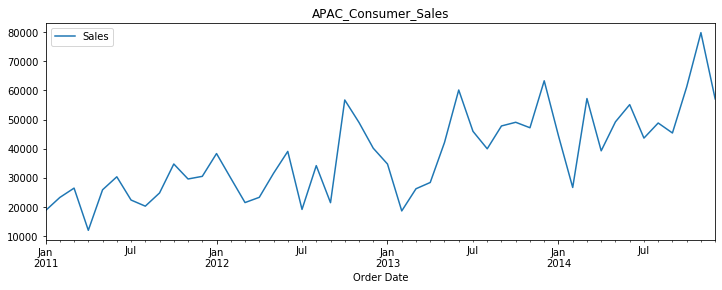

In [27]:
retail_cv.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC_Consumer_Sales')
plt.show(block=False)

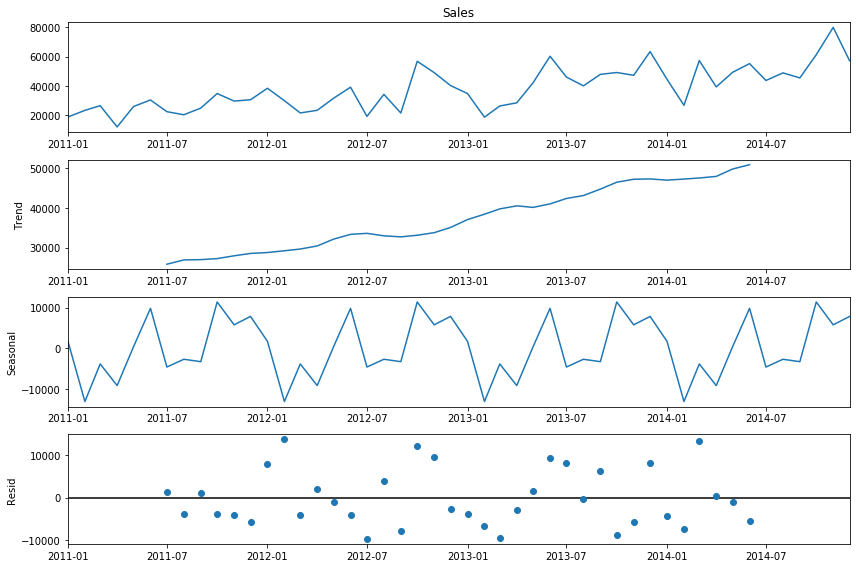

In [28]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(retail_cv["Sales"], model='additive') # additive seasonal index
fig = decomposition.plot()
#decomposition = sm.tsa.seasonal_decompose(data.Sales, model="additive", freq = 12)
plt.show()

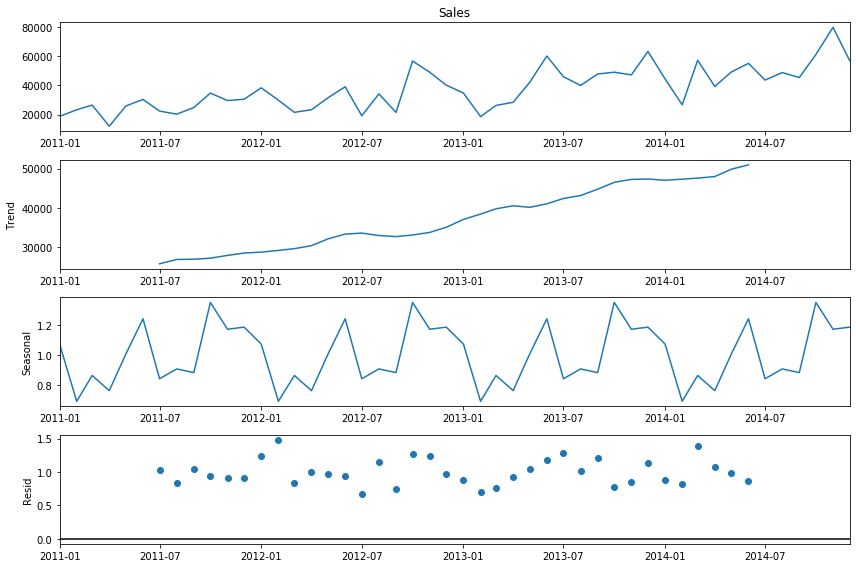

In [29]:
decomposition = sm.tsa.seasonal_decompose(retail_cv["Sales"], model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [30]:
retail_cv.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


# Forecasting using different algorithms

## Train-Test-Split

In [31]:
train_len = 42
train = retail_cv[0:train_len]
test = retail_cv[train_len:]

## Naive Method

In [32]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

### Plot train, test and forecast

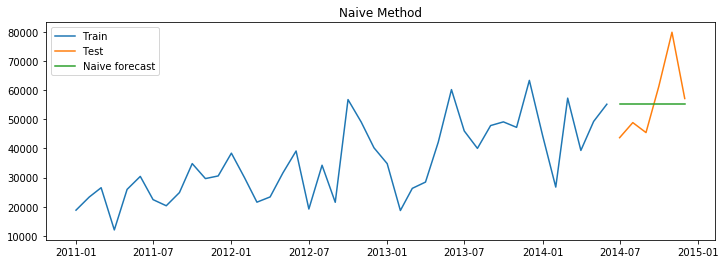

In [33]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


## Simple average

In [35]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

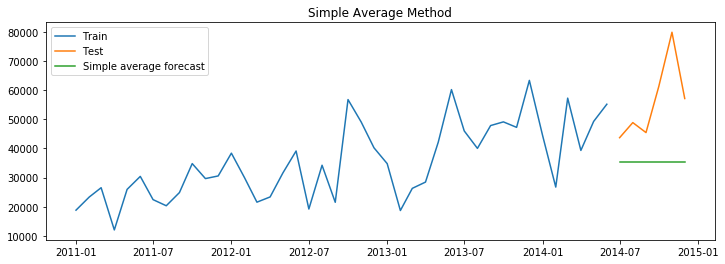

In [36]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [37]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


## Simple Moving Average

In [38]:
y_hat_sma = retail_cv.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = retail_cv['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

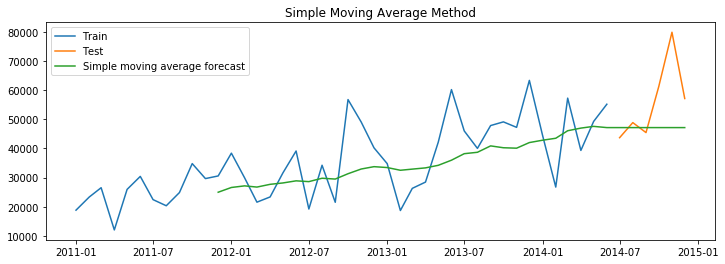

In [39]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [40]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10


## Simple Exponential Smoothing Technique

In [41]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2 
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': None, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Plot train, test and forecast

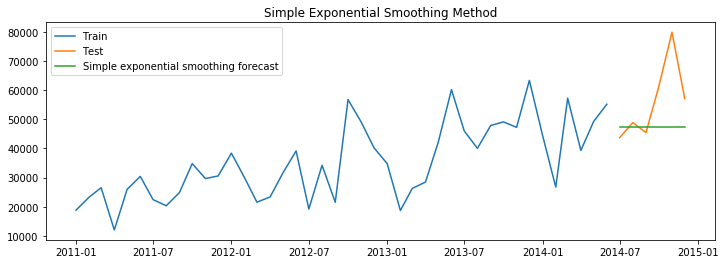

In [42]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [43]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99


## Holt Method with Trend

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

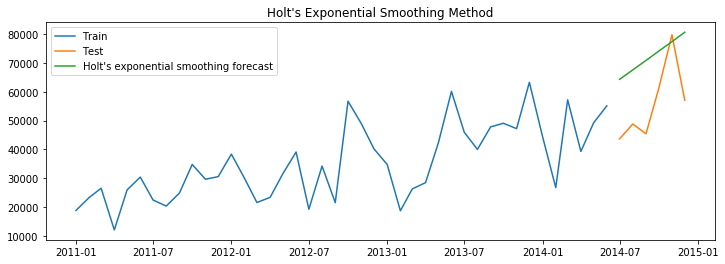

In [45]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [46]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57


# Holt Winters' additive method

In [47]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.0020374886703564874, 'smoothing_slope': 0.0020374868438797038, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 29676.666994239353, 'initial_slope': 723.317636007915, 'initial_seasons': array([ -9378.87329099, -19734.27615341, -12187.76564172, -19978.47396353,
        -9315.9790386 ,  -1060.75172544, -14280.27499763, -12958.46182918,
       -13443.04599114,    963.6376487 ,  -4636.67766042,  -2722.90140336]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot train, test and forecast

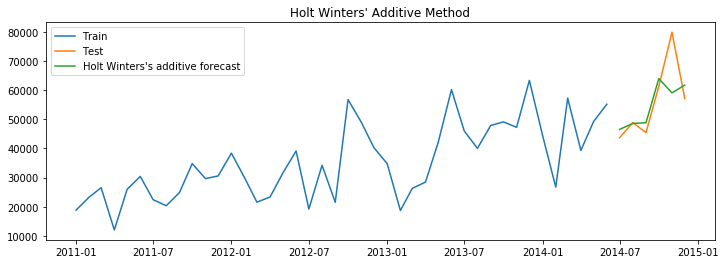

In [48]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RSME and MAPE

In [49]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84


# Holt Winters' Multiplicative method

In [50]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 9.693028733848621e-09, 'smoothing_slope': 9.123559401830165e-09, 'smoothing_seasonal': 2.9299671943913878e-08, 'damping_slope': nan, 'initial_level': 34110.96530161187, 'initial_slope': 730.4170382646302, 'initial_seasons': array([0.71585886, 0.4862027 , 0.68202326, 0.53148784, 0.73796969,
       0.90144356, 0.6247045 , 0.6570469 , 0.64896112, 0.93178148,
       0.82775312, 0.88438021]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot train, test and forecast

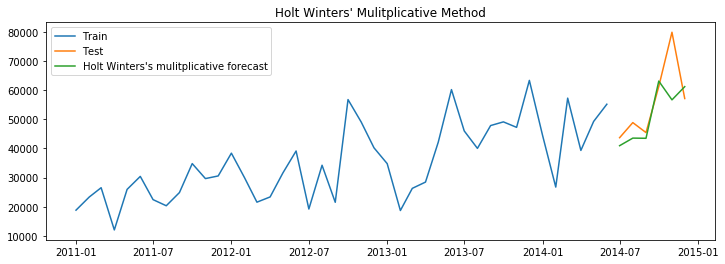

In [51]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [52]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12


# Auto Regressive methods

## Stationarity vs non-stationary time series

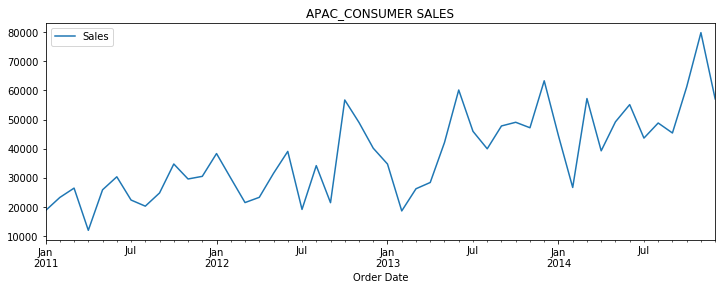

In [53]:
retail_cv['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC_CONSUMER SALES')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [54]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(retail_cv['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


Null hypothesis for ADF test is that the series is not stationary and the alternative hypothesis is that it is stationary.

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [55]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(retail_cv['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


Null hypothesis for KPSS test is that the series is stationary and the alternative hypothesis is that it is not stationary.

## Box Cox transformation to make variance constant

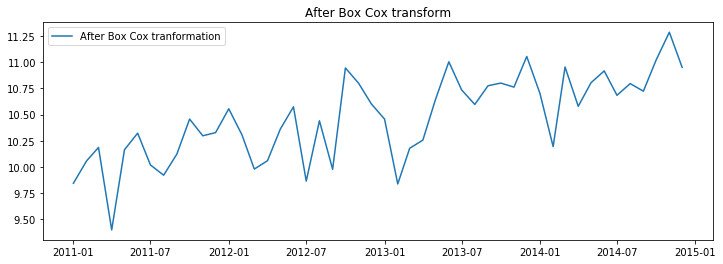

In [56]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(retail_cv['Sales'], lmbda=0), index = retail_cv.index) # lmbda=0 implies log transformation

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

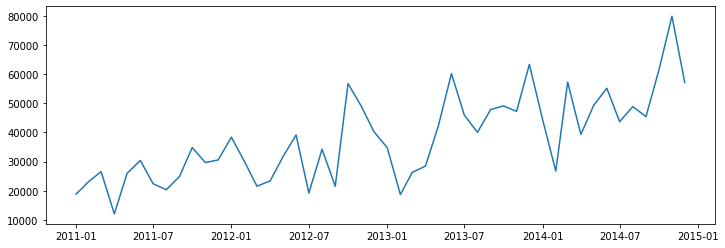

In [57]:
plt.figure(figsize=(12,4))
plt.plot( retail_cv['Sales'], label='Retail_CV')
plt.show()

## Differencing to Remove Trend

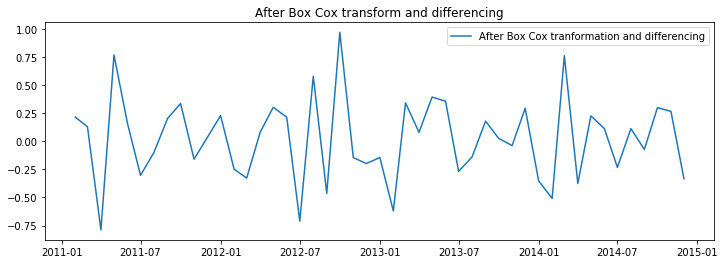

In [58]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), retail_cv.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [59]:
data_boxcox_diff.dropna(inplace=True)

In [60]:
train_data_boxcox = data_boxcox[:train_len] # Arima
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len] # Rest
test_data_boxcox_diff = data_boxcox_diff[train_len:]

Differencing and boxcox done on the entire data, hence need to split it again

In [61]:
test_data_boxcox_diff

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

## Autocorrelation function (ACF)

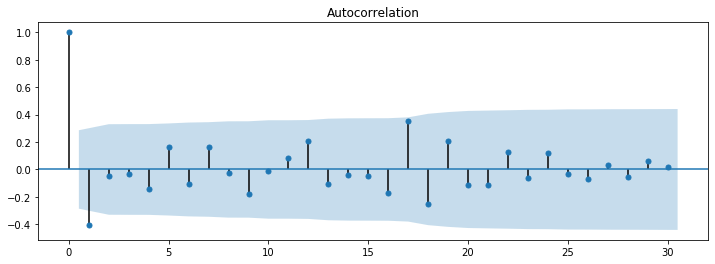

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

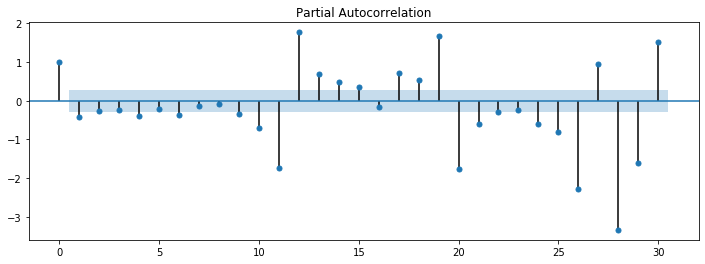

In [63]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Auto regression method (AR)

In [64]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.020458
ar.L1.y   -0.410077
dtype: float64


C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Recover original time series

In [65]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

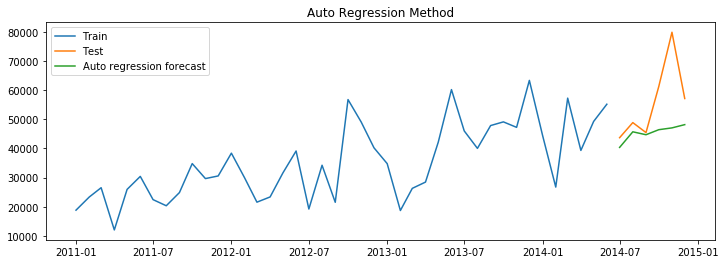

In [66]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [67]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results



,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,15257.53,16.11


## Moving average method (MA)

In [68]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.020855
ma.L1.y   -1.000000
dtype: float64


C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Recover original time series

In [69]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

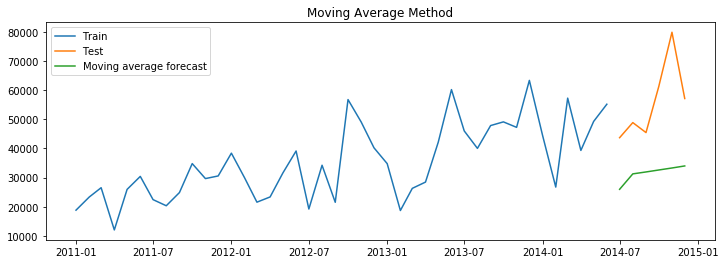

In [70]:
plt.figure(figsize=(12,4))
plt.plot(retail_cv['Sales'][:train_len], label='Train')
plt.plot(retail_cv['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [71]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,15257.53,16.11
0,Moving Average (MA) method,26850.20,41.97


## Auto regression moving average method (ARMA)

In [72]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.020847
ar.L1.y    0.069472
ma.L1.y   -1.000000
dtype: float64


C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Recover original time series

In [73]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

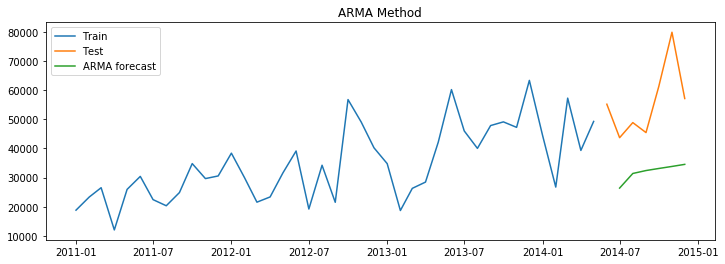

In [74]:
plt.figure(figsize=(12,4))
plt.plot( retail_cv['Sales'][:train_len-1], label='Train')
plt.plot(retail_cv['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [75]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results =  pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,15257.53,16.11
0,Moving Average (MA) method,26850.20,41.97
0,Autoregressive moving average (ARMA) method,26425.80,41.17


## Auto regressive integrated moving average (ARIMA)

In [76]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Recover original time series forecast

In [77]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

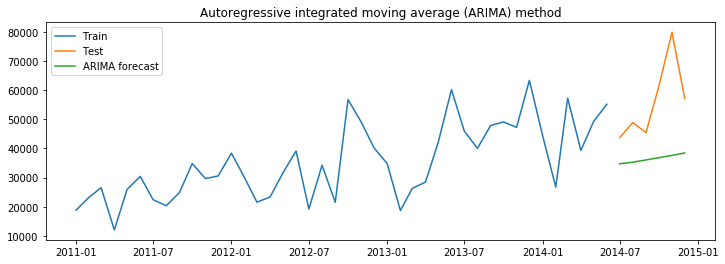

In [78]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [79]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results =  pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,15257.53,16.11
0,Moving Average (MA) method,26850.20,41.97
0,Autoregressive moving average (ARMA) method,26425.80,41.17


## Seasonal auto regressive integrated moving average (SARIMA)

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kaash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1      -0.041758
ma.L1      -0.997142
ar.S.L12    0.099964
ma.S.L12   -0.972619
sigma2      0.058191
dtype: float64


### Recover original time series forecast

In [81]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

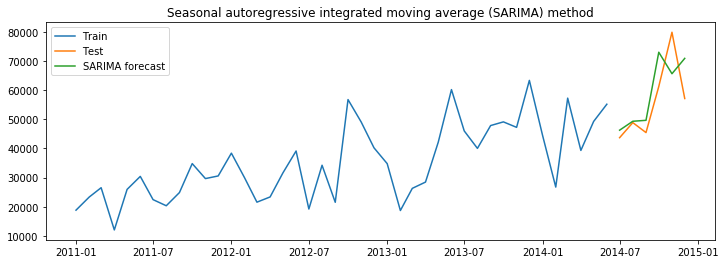

In [82]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [83]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results =  pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,15257.53,16.11
0,Moving Average (MA) method,26850.20,41.97
0,Autoregressive moving average (ARMA) method,26425.80,41.17


In [84]:
results.reset_index(drop=True,inplace=True)

In [85]:
results.drop(columns=["RMSE"], inplace=True)
results

,Method,MAPE
0,Naive method,17.47
1,Simple average method,34.34
2,Simple moving average forecast,16.10
3,Simple exponential smoothing forecast,15.99
4,Holt's exponential smoothing method,34.57
5,Holt Winters' additive method,8.84
6,Holt Winters' multiplicative method,10.12
7,Autoregressive (AR) method,16.11
8,Moving Average (MA) method,41.97
9,Autoregressive moving average (ARMA) method,41.17


In [86]:
# results = results.rename(columns = {'index':'S.NO'})
# results